# A Data-Driven Approach to Wine Quality Ratings and Consumer Preferences

### Team Members: Charles Lazaroni, Lucas Attias, and Mark Cappiello

##### Data source: https://www.kaggle.com/datasets/zynicide/wine-reviews
- winemag-data-130k-v2.csv

## Exploratory Data Analysis

The purpose of this section is to analyze patterns and trends in the data. The methods used in this section involve graphing the numerical data with histogram and scatterplot,  clustering the data using unsupervised techniques such as k-means clustering, and analyzing descriptive text using word cloud. Graphing the data provides insight on how to clean and process the data before building a model for machine learning. Pair plots and correlation matrices will also be utilized to determine if any patterns exist in relationships between features. Clustering techniques will be used on a cleaned data set to ensure that the numerical values are properly scaled and dimensionality has been reduced.

In [1]:
# prompt: access a kaggle dataset

!pip install kaggle

# Upload your kaggle.json file (contains API key)
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download a specific dataset
!kaggle datasets download -d zynicide/wine-reviews

# # Unzip the downloaded dataset
# !unzip <dataset_name>.zip

# Now you can access the dataset files in the current directory.
# For example, if the dataset contains a CSV file named 'data.csv':
# import pandas as pd
# df = pd.read_csv('data.csv')
# print(df.head())


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/zynicide/wine-reviews
License(s): CC-BY-NC-SA-4.0
 98% 50.0M/50.9M [00:02<00:00, 28.7MB/s]
100% 50.9M/50.9M [00:02<00:00, 19.6MB/s]


In [2]:
!unzip wine-reviews.zip

Archive:  wine-reviews.zip
  inflating: winemag-data-130k-v2.csv  
  inflating: winemag-data-130k-v2.json  
  inflating: winemag-data_first150k.csv  


In [3]:
# Load and preprocess the data

import pandas as pd

df = pd.read_csv('/content/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


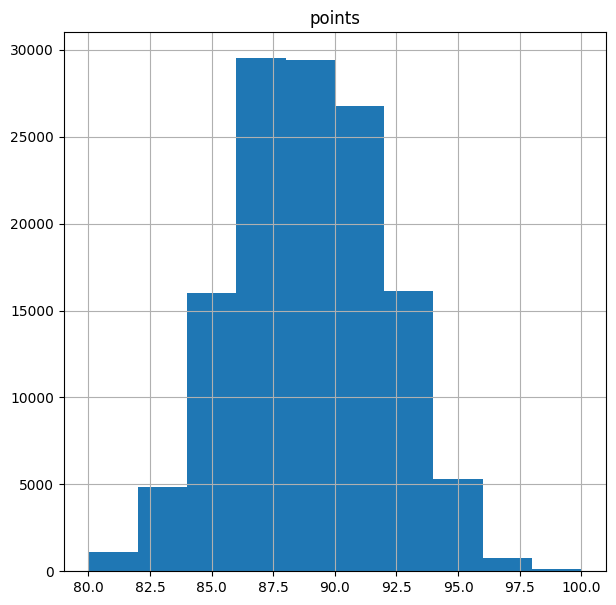

In [4]:
# Plot numeric data

import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Histogram of 'points' column
df_numeric.hist('points', figsize=(7, 7))
plt.show()


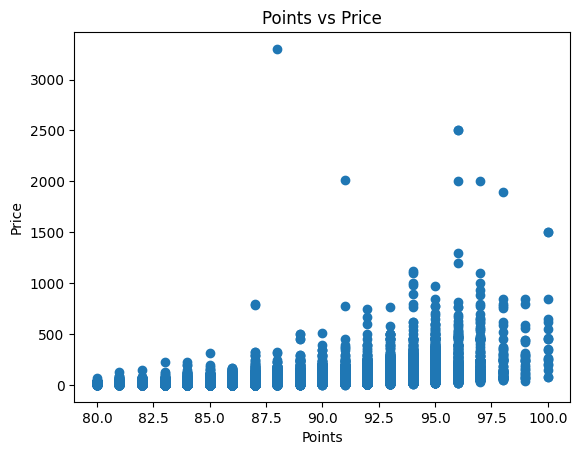

In [5]:
# Scatterplot of 'points' vs 'price'

plt.scatter(df_numeric['points'], df_numeric['price'])
plt.title('Points vs Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()



Correlation Matrix:
            Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004823
points        0.007124  1.000000  0.416167
price         0.004823  0.416167  1.000000


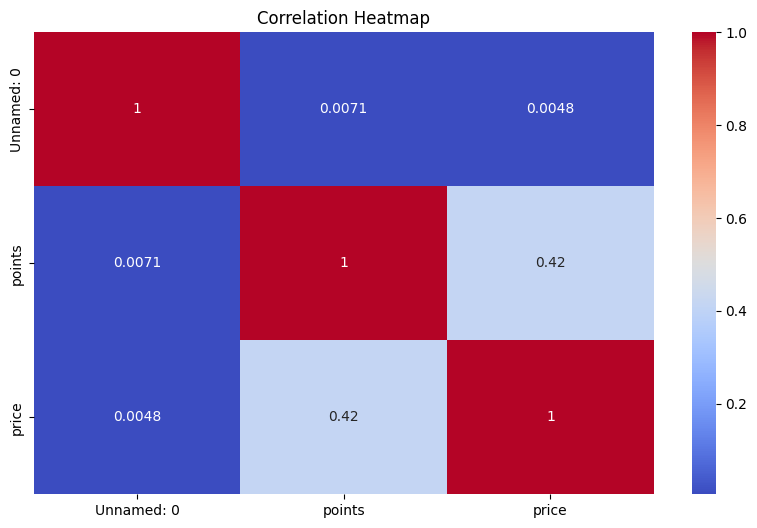

In [6]:
# Correlation Matrix Heatmap

correlation_matrix = df_numeric.corr()

#correlation_matrix = wine_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

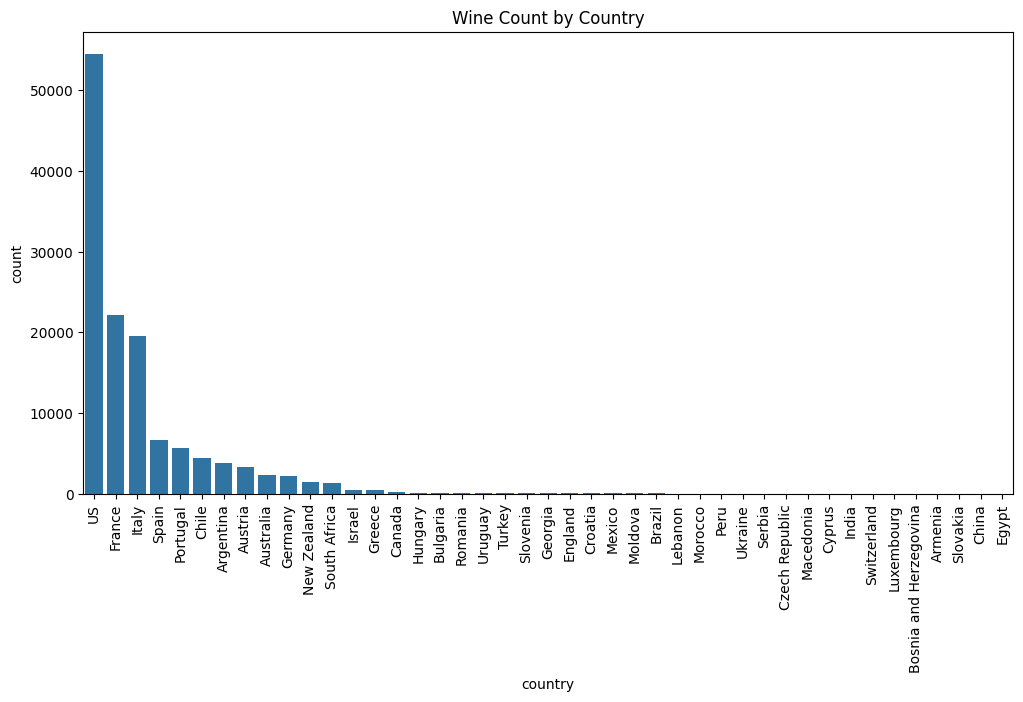

In [7]:
# Count plots for categorical feature "country"

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title("Wine Count by Country")
plt.xticks(rotation=90)
plt.show()

It is clear from the numeric plots that there is a normal distribution of wine ratings ('points') with most ratings being between 86 and 88 points. It is also apparent that as rating points increases there are more data points with a higher price, and there is a positive correlation between price and points of 0.42. Most of the wines in this dataset were processed in The US. The scatterplot shows that there are outliers that will need to be handled when cleaning the data.

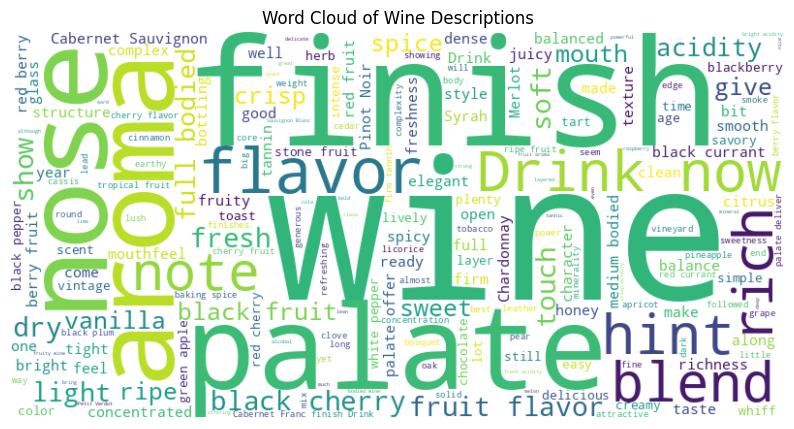

In [9]:
# Word cloud for wine descriptions

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Wine Descriptions")
plt.show()

## Data Preparation, Model Selection, and Evaluation

In this phase of analysis the data will be cleaned and processed for machine learning. Numeric columns will be scaled, and unnecessary features will be removed. The purpose of scaling the data is to normalize the numeric data to be comparable with one another. Outliers will be identified using the IQR method, and imputation by using the mean for numeric features is a valid option. Categorical columns will then be encoded using OneHotEncoding and the scaled numeric columns will be joined with the encoded columns.

Data preperation will be completed for the consumer stakeholders and the winery stakeholders, and machine learning techniques will then be applied to the cleaned data for each stakeholder.

## Consumer Stakeholders

In [10]:
consumer_df = df[['country', 'description', 'points', 'price', 'province', 'region_1', 'variety', 'winery', 'taster_name']]

In [11]:
# prompt: group consumer_df by taster_name

grouped_consumer_df = consumer_df.groupby('taster_name')
# You can then perform operations on the grouped data, such as calculating the mean points for each taster:
# print(grouped_consumer_df['points'].mean())

In [12]:
grouped_consumer_df.head()

,country,description,points,price,province,region_1,variety,winery,taster_name
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,White Blend,Nicosia,Kerin O’Keefe
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Portuguese Red,Quinta dos Avidagos,Roger Voss
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Pinot Gris,Rainstorm,Paul Gregutt
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Riesling,St. Julian,Alexander Peartree
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Pinot Noir,Sweet Cheeks,Paul Gregutt
...,...,...,...,...,...,...,...,...,...
19831,Australia,A blend of Shiraz from Eden Valley and the val...,93,50.0,South Australia,Barossa,Shiraz,Torbreck,Christina Pickard
41472,US,"Buttered toast, yeast and a hint of nut wrap a...",87,19.0,California,Carneros,Chardonnay,Domaine Chandon,Christina Pickard
44042,US,"Dried spices, dusty earth and steely red fruit...",89,29.0,California,Carneros,Pinot Meunier,Domaine Chandon,Christina Pickard
59324,US,"This 100% Pinot Noir is full-bodied and rich, ...",89,30.0,California,Sonoma County,Sparkling Blend,Breathless,Christina Pickard


In [13]:
# prompt: sorted_mean_points = grouped_consumer_df['points'].mean().sort_values(ascending=False)
# sorted_mean_points
# add in number of reviews

sorted_mean_points = grouped_consumer_df['points'].mean().sort_values(ascending=False)
# Calculate the number of reviews for each taster
review_counts = grouped_consumer_df.size()

# Combine the sorted mean points and review counts into a single DataFrame
sorted_taster_stats = pd.DataFrame({'mean_points': sorted_mean_points, 'num_reviews': review_counts})

# Display the sorted statistics
sorted_taster_stats

,mean_points,num_reviews
taster_name,,
Alexander Peartree,85.855422,415
Anna Lee C. Iijima,88.415629,4415
Anne Krebiehl MW,90.562551,3685
Carrie Dykes,86.395683,139
Christina Pickard,87.833333,6
Fiona Adams,86.888889,27
Jeff Jenssen,88.319756,491
Jim Gordon,88.626287,4177
Joe Czerwinski,88.536235,5147


In [14]:
# prompt: sorted_taster_stats = pd.DataFrame({'mean_points': sorted_mean_points, 'num_reviews': review_counts}) sort this

sorted_taster_stats = sorted_taster_stats.sort_values(by=['mean_points', 'num_reviews'], ascending=[False, False])
sorted_taster_stats

,mean_points,num_reviews
taster_name,,
Anne Krebiehl MW,90.562551,3685
Matt Kettmann,90.008686,6332
Virginie Boone,89.213379,9537
Mike DeSimone,89.101167,514
Paul Gregutt,89.082564,9532
Kerin O’Keefe,88.867947,10776
Sean P. Sullivan,88.755739,4966
Roger Voss,88.708003,25514
Jim Gordon,88.626287,4177


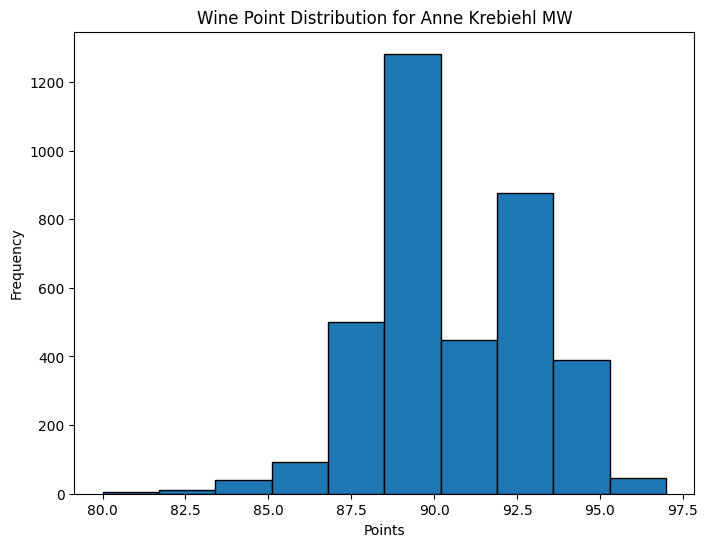

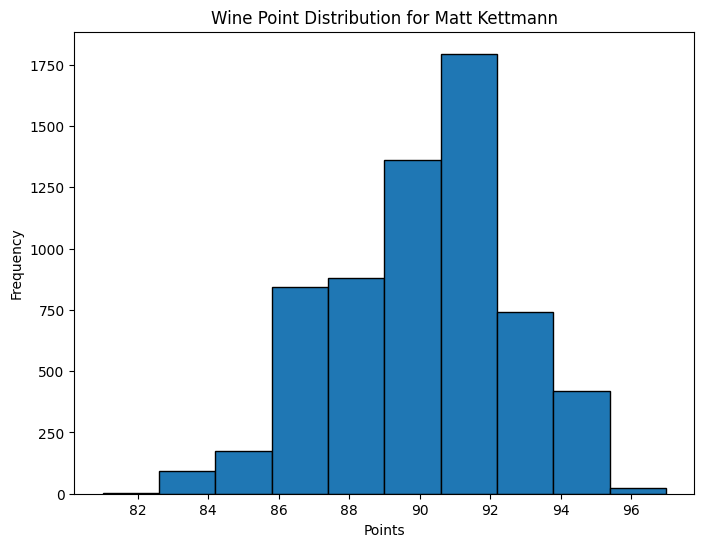

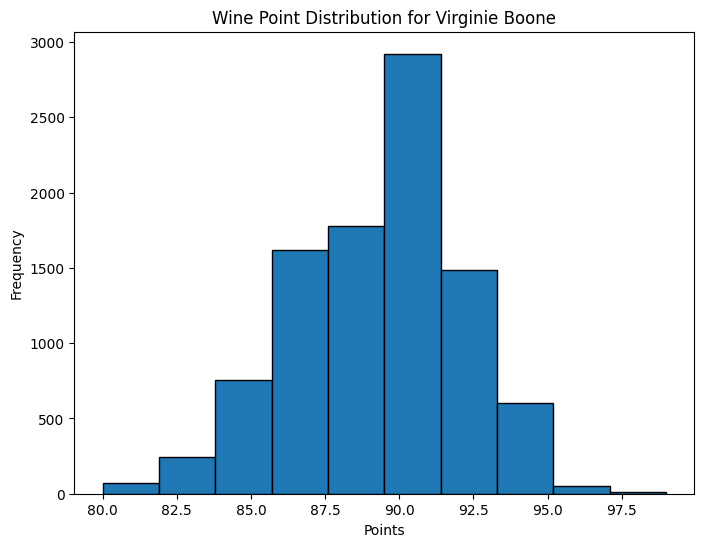

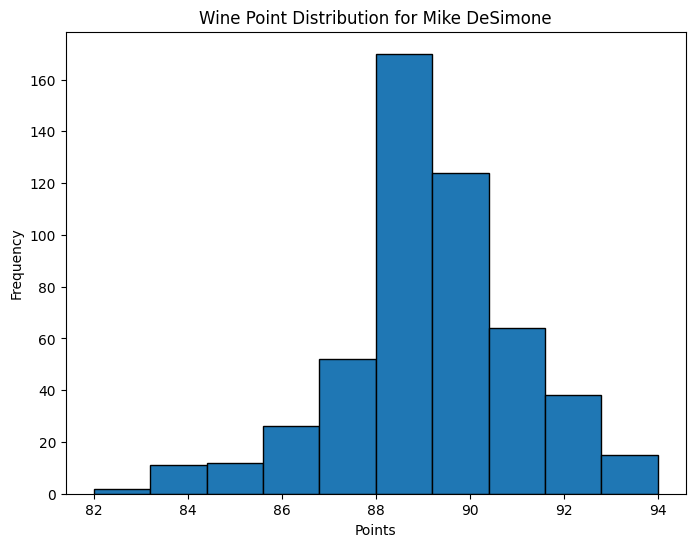

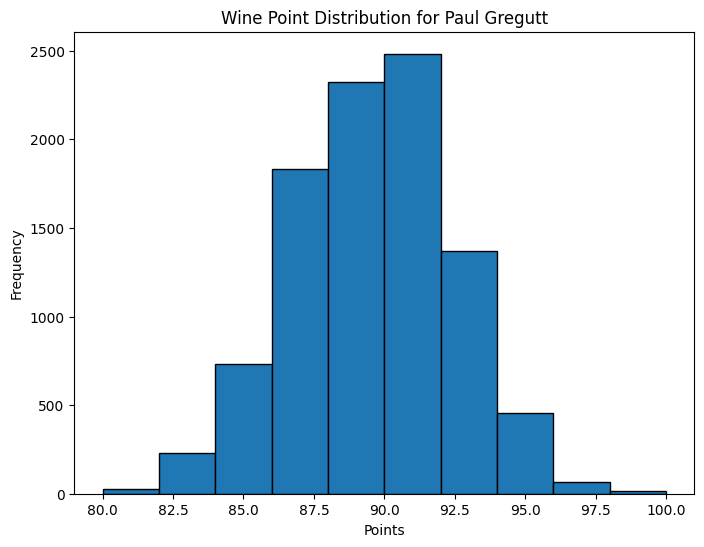

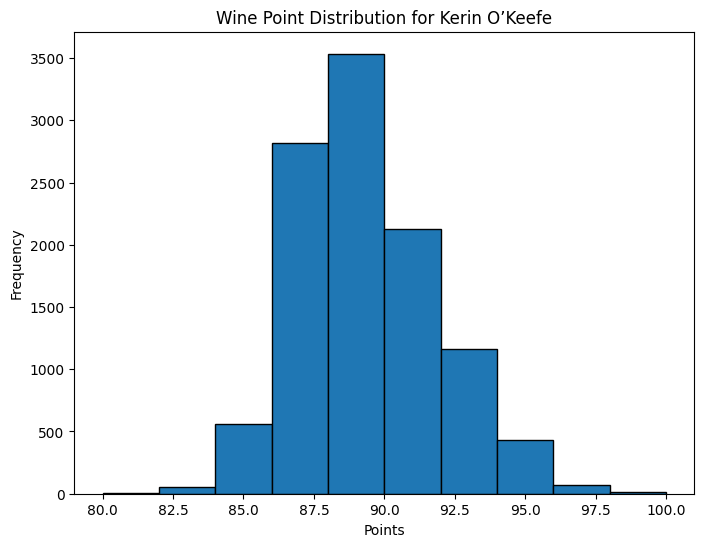

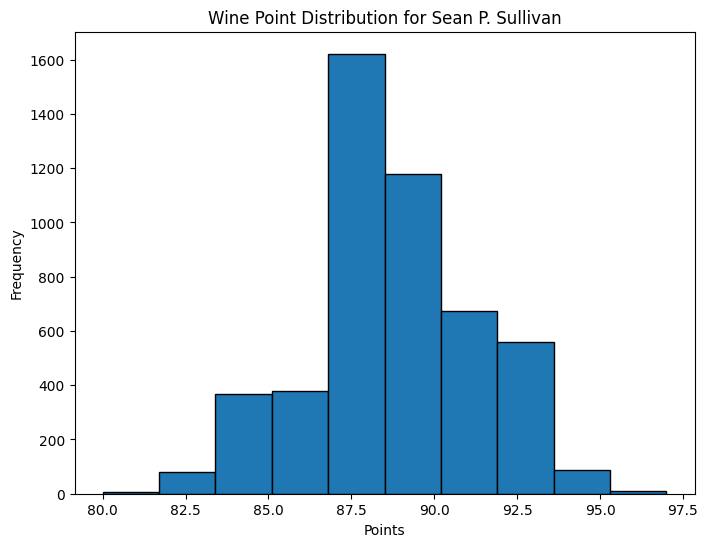

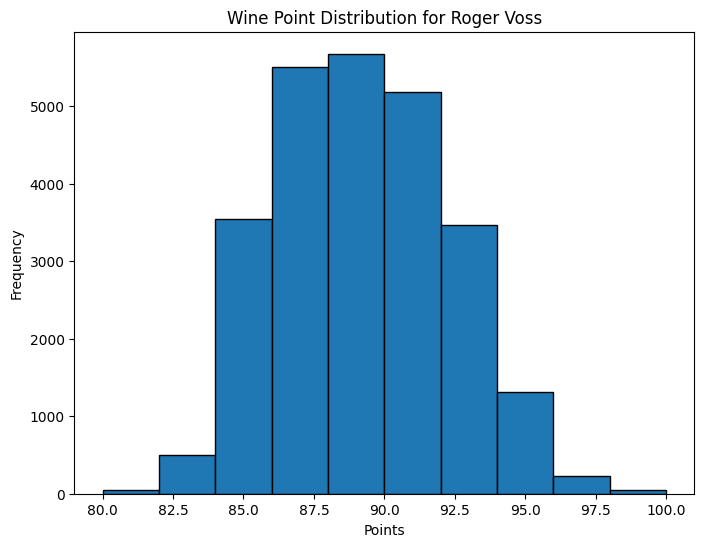

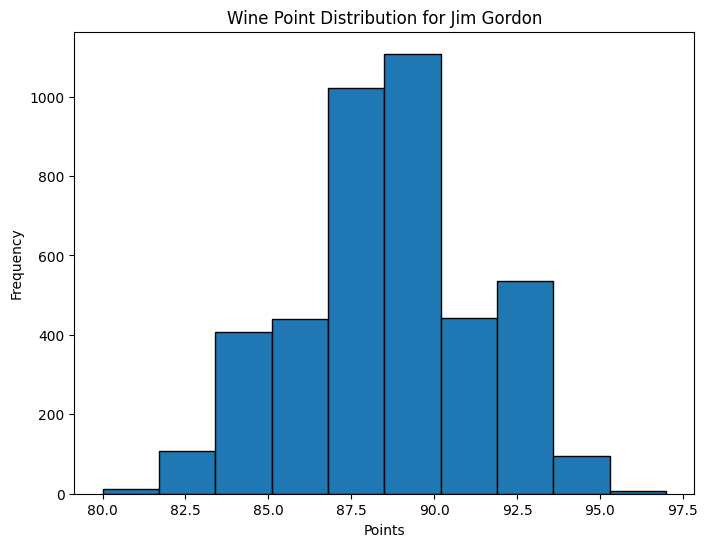

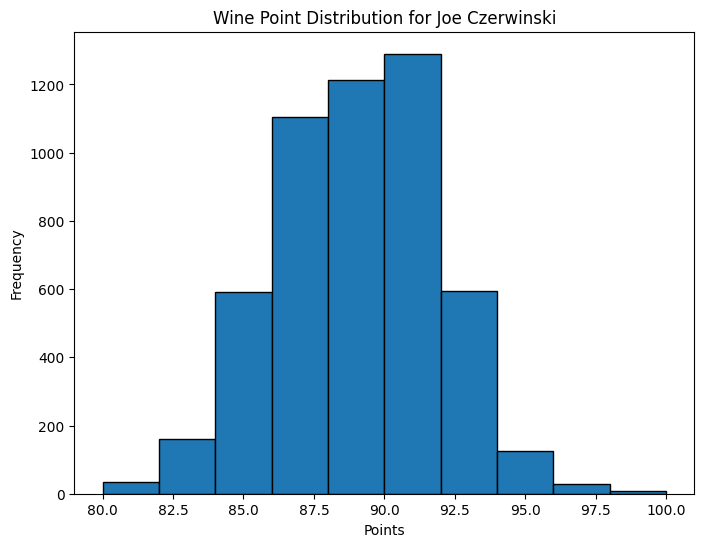

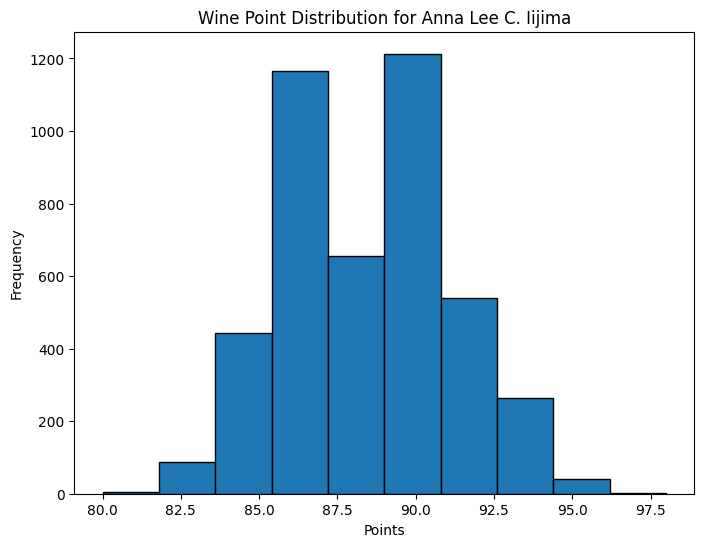

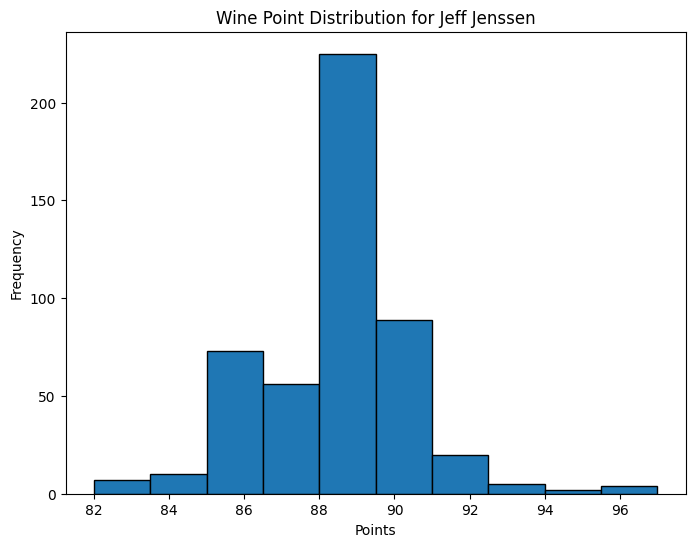

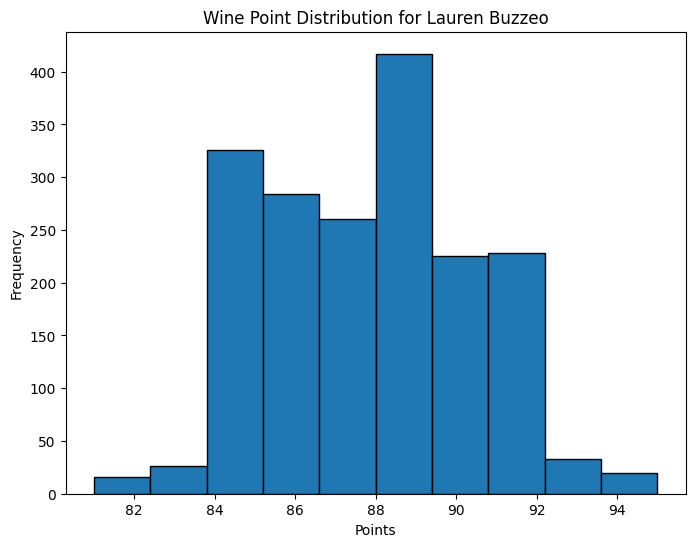

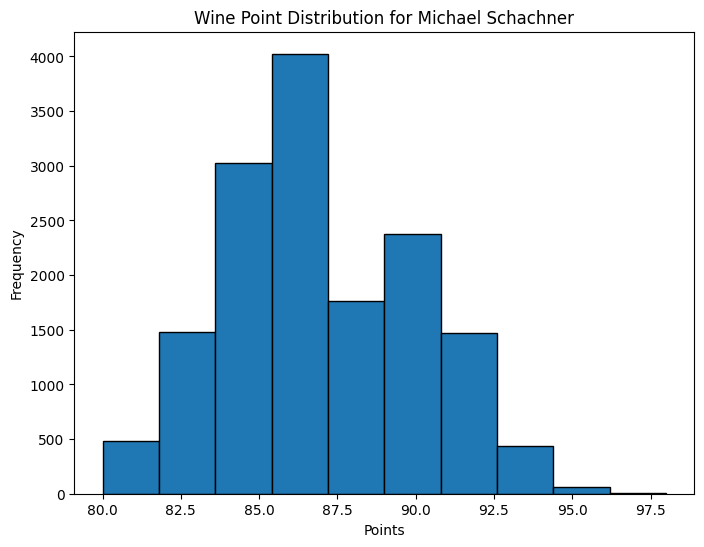

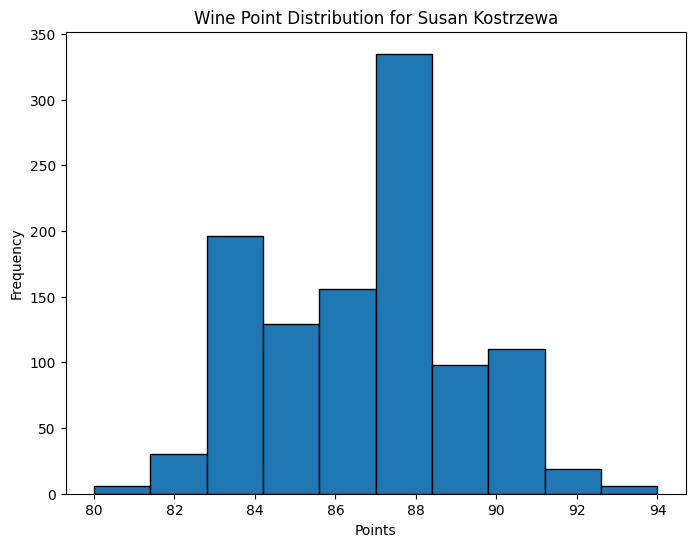

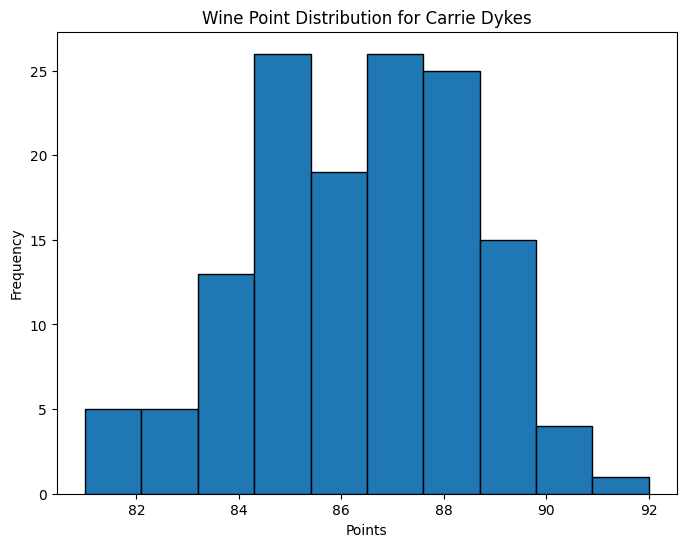

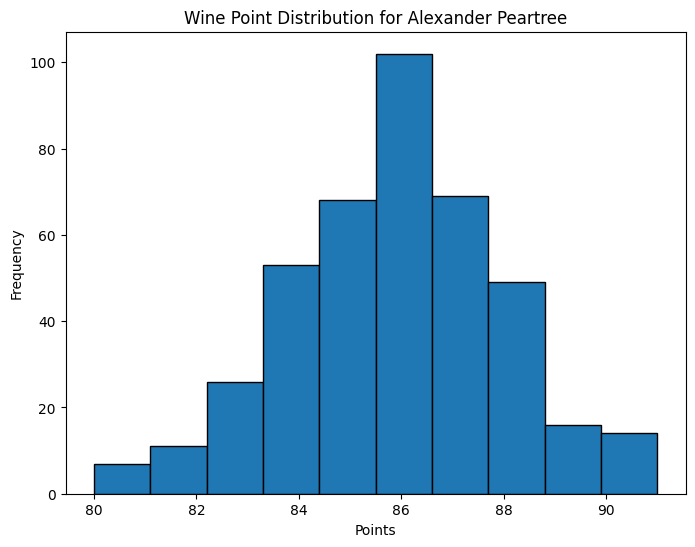

In [15]:
# prompt: take consumer_df.groupby('taster_name') and then make a histogram for each based on the points. remove reviewers with under 100 reviews

import matplotlib.pyplot as plt

# Filter out reviewers with fewer than 100 reviews
filtered_reviewers = sorted_taster_stats[sorted_taster_stats['num_reviews'] >= 100].index

# Iterate through the filtered reviewers and create histograms
for reviewer in filtered_reviewers:
    reviewer_data = consumer_df[consumer_df['taster_name'] == reviewer]
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.hist(reviewer_data['points'], bins=10, edgecolor='black')  # Use 10 bins, adjust as needed
    plt.title(f'Wine Point Distribution for {reviewer}')
    plt.xlabel('Points')
    plt.ylabel('Frequency')
    plt.show()

In [16]:
for reviewer in filtered_reviewers:
    reviewer_data = consumer_df[consumer_df['taster_name'] == reviewer]

    # Calculate quantiles for 'points'
    q1 = reviewer_data['points'].quantile(0.25)
    q3 = reviewer_data['points'].quantile(0.75)

    # Create masks for top and bottom 25%
    bad_reviews_mask = (consumer_df['taster_name'] == reviewer) & (consumer_df['points'] <= q1)
    good_reviews_mask = (consumer_df['taster_name'] == reviewer) & (consumer_df['points'] >= q3)

    # Assign values for the new columns
    consumer_df.loc[bad_reviews_mask, f'{reviewer}_bad'] = consumer_df.loc[bad_reviews_mask, 'description']
    consumer_df.loc[good_reviews_mask, f'{reviewer}_good'] = consumer_df.loc[good_reviews_mask, 'description']


<ipython-input-16-940d33a2bbd6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_df.loc[bad_reviews_mask, f'{reviewer}_bad'] = consumer_df.loc[bad_reviews_mask, 'description']
<ipython-input-16-940d33a2bbd6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumer_df.loc[good_reviews_mask, f'{reviewer}_good'] = consumer_df.loc[good_reviews_mask, 'description']
<ipython-input-16-940d33a2bbd6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [17]:
# prompt: consumer_df['Lauren Buzzeo_good'] all instances where it is 1

# Assuming consumer_df is already defined as in your provided code

# Find all instances where 'Lauren Buzzeo_good' is 1 (or any value other than NaN)
lauren_buzzeo_good_reviews = consumer_df[consumer_df['Lauren Buzzeo_good'].notna()]
lauren_buzzeo_bad_reviews  = consumer_df[consumer_df['Lauren Buzzeo_bad'].notna()]

roger_voss_good_reviews = consumer_df[consumer_df['Roger Voss_good'].notna()]
roger_voss_bad_reviews = consumer_df[consumer_df['Roger Voss_bad'].notna()]
# Display the results
lauren_buzzeo_good_reviews

,country,description,points,price,province,region_1,variety,winery,taster_name,Anne Krebiehl MW_bad,...,Lauren Buzzeo_bad,Lauren Buzzeo_good,Michael Schachner_bad,Michael Schachner_good,Susan Kostrzewa_bad,Susan Kostrzewa_good,Carrie Dykes_bad,Carrie Dykes_good,Alexander Peartree_bad,Alexander Peartree_good
197,South Africa,"This is a concentrated, fairly full and lush C...",90,23.0,Western Cape,NaN,Chenin Blanc,Spier,Lauren Buzzeo,NaN,...,NaN,"This is a concentrated, fairly full and lush C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,South Africa,"A stony, flinty character leads the nose of th...",90,40.0,Coastal Region,NaN,White Blend,Delaire Graff,Lauren Buzzeo,NaN,...,NaN,"A stony, flinty character leads the nose of th...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,South Africa,This leads with clean yet soft scents of ripe ...,90,20.0,Western Cape,NaN,Chardonnay,Eikendal,Lauren Buzzeo,NaN,...,NaN,This leads with clean yet soft scents of ripe ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,South Africa,"There's a pleasant, toasty seam throughout the...",90,25.0,Stellenbosch,NaN,Chardonnay,Oldenburg,Lauren Buzzeo,NaN,...,NaN,"There's a pleasant, toasty seam throughout the...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,South Africa,"This is a round and rich wine, with notes of w...",90,20.0,Stellenbosch,NaN,Chenin Blanc,Oldenburg,Lauren Buzzeo,NaN,...,NaN,"This is a round and rich wine, with notes of w...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128992,South Africa,This luminous and unique Chenin Blanc straw wi...,93,50.0,Stellenbosch,NaN,Chenin Blanc,de Trafford,Lauren Buzzeo,NaN,...,NaN,This luminous and unique Chenin Blanc straw wi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129312,South Africa,"A blend of 45% Malbec, 34% Merlot and 21% Cabe...",90,79.0,Paarl,NaN,Bordeaux-style Red Blend,Vilafonté,Lauren Buzzeo,NaN,...,NaN,"A blend of 45% Malbec, 34% Merlot and 21% Cabe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129883,South Africa,A tropical tone of grilled pineapple adds brea...,91,37.0,Cape Peninsula,NaN,Chardonnay,Cape Point Vineyards,Lauren Buzzeo,NaN,...,NaN,A tropical tone of grilled pineapple adds brea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129907,South Africa,"Toasty aroams of grilled apple, peach and hone...",91,20.0,Robertson,NaN,Chardonnay,De Wetshof,Lauren Buzzeo,NaN,...,NaN,"Toasty aroams of grilled apple, peach and hone...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# prompt: lauren_buzzeo_good_reviews = consumer_df[consumer_df['Lauren Buzzeo_good'].notna()] count the column 'variety' in this and output a table with the variety and their count

# Count the occurrences of each variety in lauren_buzzeo_good_reviews
lauren_buzzeo_good_variety_counts = lauren_buzzeo_good_reviews['variety'].value_counts()
lauren_buzzeo_bad_reviews_variety_counts = lauren_buzzeo_bad_reviews['variety'].value_counts()

roger_voss_good_variety_counts = roger_voss_good_reviews['variety'].value_counts()
roger_voss_bad_reviews_variety_counts = roger_voss_bad_reviews['variety'].value_counts()
# Create a DataFrame from the variety counts
lauren_buzzeo_good_variety_counts_df = pd.DataFrame({'Variety': lauren_buzzeo_good_variety_counts.index, 'Count': lauren_buzzeo_good_variety_counts.values})
lauren_buzzeo_bad_reviews_variety_counts_df = pd.DataFrame({'Variety': lauren_buzzeo_bad_reviews_variety_counts.index, 'Count': lauren_buzzeo_bad_reviews_variety_counts.values})

roger_voss_good_variety_counts_df = pd.DataFrame({'Variety': roger_voss_good_variety_counts.index, 'Count': roger_voss_good_variety_counts.values})
roger_voss_bad_reviews_variety_counts_df = pd.DataFrame({'Variety': roger_voss_bad_reviews_variety_counts.index, 'Count': roger_voss_bad_reviews_variety_counts.values})
# Display the DataFrame
roger_voss_good_variety_counts_df.head(20)


,Variety,Count
0,Bordeaux-style Red Blend,1435
1,Chardonnay,1014
2,Pinot Noir,831
3,Portuguese Red,781
4,Champagne Blend,490
5,Bordeaux-style White Blend,289
6,Sauvignon Blanc,263
7,Port,248
8,Gamay,187
9,Riesling,187


In [19]:
roger_voss_bad_reviews_variety_counts_df.head(20)

,Variety,Count
0,Bordeaux-style Red Blend,1150
1,Rosé,856
2,Portuguese Red,610
3,Chardonnay,558
4,Portuguese White,556
5,Gamay,307
6,Sauvignon Blanc,291
7,Bordeaux-style White Blend,290
8,Pinot Noir,277
9,White Blend,110


In [21]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Suppose df is your dataframe
# df = pd.read_csv('your_wine_data.csv')

# --- Step 1: Data Cleaning and Feature Selection ---
# Drop rows with critical missing values for this task
df = df.dropna(subset=['country', 'variety', 'description', 'points', 'price'])

# For the sake of demonstration, let's pick these features:
# Numeric: points, price
# Categorical: country, variety (you can add province, region_1, etc. if desired)
# Text: description

numeric_features = ['points', 'price']
categorical_features = ['country', 'variety']  # add 'province', 'region_1', etc. if needed
text_feature = 'description'

# --- Step 2: Encoding and Vectorization ---
# Handle textual data with TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)  # limit features for performance
text_vectors = tfidf.fit_transform(df[text_feature])


In [22]:

# Encode categorical data
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_encoded = ohe.fit_transform(df[categorical_features])

# Scale numeric data
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df[numeric_features])

# Combine all feature sets: [numeric | categorical | text]
# text_vectors is a sparse matrix, cat_encoded and num_scaled are dense arrays.
# We need to combine them carefully. Let's convert all to sparse to stack horizontally.
from scipy.sparse import hstack, csr_matrix
num_sparse = csr_matrix(num_scaled)
cat_sparse = csr_matrix(cat_encoded)

X = hstack([num_sparse, cat_sparse, text_vectors])  # Combined feature space

# --- Step 3: Dimensionality Reduction ---
# High-dimensional data can be reduced with PCA or t-SNE.
# First do PCA to reduce dimensionality before t-SNE (t-SNE is very expensive).
pca = PCA(n_components=50, random_state=42)  # reduce to a manageable dimension
X_pca = pca.fit_transform(X.toarray())  # converting to array for PCA


In [ ]:
#!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00



**Clustering the data**

Clustering is a useful technique for visualizing the groupings of objects in a dataset. By using unsupervised clustering methods on the wine data in this cleaned dataset we can group these datapoints into clusters based on similarity. The method of k-means clustering facilitates pattern recognition during the exploratory phase of the analysis.

***Long Run Time*** -- remove comment markers to execute

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Best number of clusters based on silhouette score: 3 with score: 0.3566886


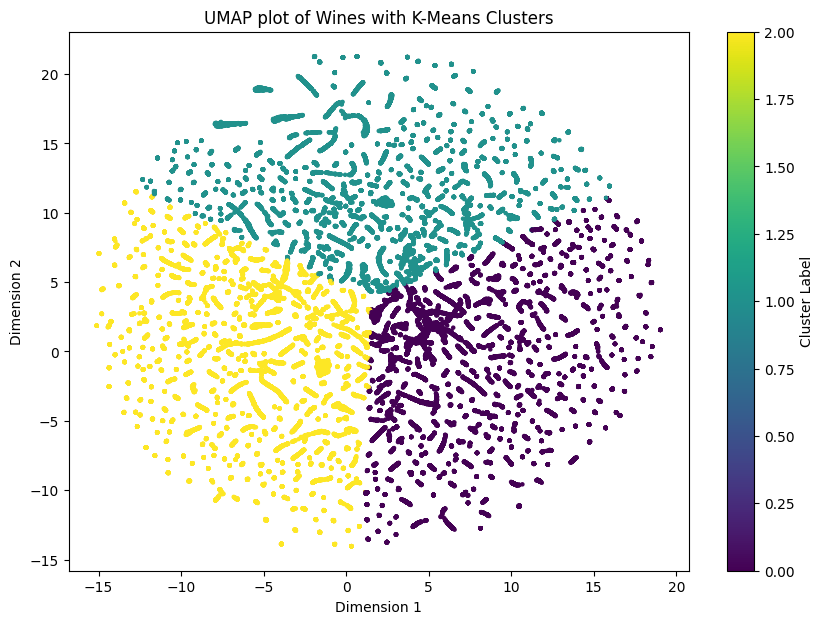

                                                title             variety  \
1       Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2       Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5   Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
6    Terre di Giurfo 2013 Belsito Frappato (Vittoria)            Frappato   
7               Trimbach 2012 Gewurztraminer (Alsace)      Gewürztraminer   
8   Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...      Gewürztraminer   
9   Jean-Baptiste Adam 2012 Les Natures Pinot Gris...          Pinot Gris   
10  Kirkland Signature 2011 Mountain Cuvée Caberne...  Cabernet Sauvignon   
11            Leon Beyer 2012 Gewurztraminer (Alsace)      Gewürztraminer   
14           Mirassou 2012 Chardonnay (Central Coast)          Chardonnay   

In [ ]:
'''
import umap.umap_ as umap

# --- Step 3 (modified): Dimensionality Reduction using UMAP ---
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_2d = reducer.fit_transform(X_pca)

# --- Step 4: Clustering ---
# Try different numbers of clusters and evaluate silhouette to choose the best k
sil_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_2d)
    sil = silhouette_score(X_2d, labels)
    sil_scores[k] = sil

best_k = max(sil_scores, key=sil_scores.get)
print("Best number of clusters based on silhouette score:", best_k, "with score:", sil_scores[best_k])

# Cluster with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_2d)

# --- Step 5: Visualization ---
plt.figure(figsize=(10,7))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='viridis', s=5)
plt.title('UMAP plot of Wines with K-Means Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster Label')
plt.show()

# --- Interpretation ---
df['cluster'] = labels
cluster_sample = df.groupby('cluster').head(5)  # See the first 5 wines of each cluster
print(cluster_sample[['title','variety','country','price','points','description']].head(50))
'''


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             120915 non-null  int64  
 1   country                120915 non-null  object 
 2   description            120915 non-null  object 
 3   designation            86148 non-null   object 
 4   points                 120915 non-null  int64  
 5   price                  120915 non-null  float64
 6   province               120915 non-null  object 
 7   region_1               101400 non-null  object 
 8   region_2               50292 non-null   object 
 9   taster_name            96420 non-null   object 
 10  taster_twitter_handle  91500 non-null   object 
 11  title                  120915 non-null  object 
 12  variety                120915 non-null  object 
 13  winery                 120915 non-null  object 
dtypes: float64(1), int64(2), object(11)
memor

In [24]:
# prompt: save df as a csv

# Assuming 'df' is your DataFrame (as defined in your provided code)
df.to_csv('wine_clusters.csv', index=False)  # Save as CSV, without the index

# To download the file:
files.download('wine_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import numpy as np

# Load data
df = pd.read_csv('/content/winemag-data-130k-v2.csv')

# Select relevant features
features = ['country', 'price', 'province', 'variety', 'winery']
df = df[features].dropna()

# Sample a random subset of 10,000 rows
df_sample = df.sample(n=10000, random_state=42)

# One-hot encode categorical features
categorical_features = ['country', 'province', 'variety', 'winery']
encoder = OneHotEncoder()
encoded_cats = encoder.fit_transform(df_sample[categorical_features]).toarray()

# Normalize numerical features
scaler = StandardScaler()
normalized_price = scaler.fit_transform(df_sample[['price']])

# Combine features
X = np.hstack([encoded_cats, normalized_price])

# Perform clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X)
df_sample['cluster'] = clusters

# Recommendation function
def recommend_similar_wine(input_wine):
    # Encode and normalize input wine
    input_encoded = encoder.transform([[
        input_wine['country'],
        input_wine['province'],
        input_wine['variety'],
        input_wine['winery']
    ]]).toarray()
    input_price = scaler.transform([[input_wine['price']]])
    input_features = np.hstack([input_encoded, input_price])

    # Find closest cluster
    input_cluster = kmeans.predict(input_features)[0]

    # Retrieve wines in the same cluster
    similar_wines = df_sample[df_sample['cluster'] == input_cluster]
    return similar_wines

# Example usage
input_wine = {
    'country': 'US',
    'price': 20,
    'province': 'California',
    'variety': 'Chardonnay',
    'winery': 'Kendall-Jackson'
}

recommended_wines = recommend_similar_wine(input_wine)
print(recommended_wines.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2950 entries, 102381 to 121759
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   2950 non-null   object 
 1   price     2950 non-null   float64
 2   province  2950 non-null   object 
 3   variety   2950 non-null   object 
 4   winery    2950 non-null   object 
 5   cluster   2950 non-null   int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 149.8+ KB
None


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


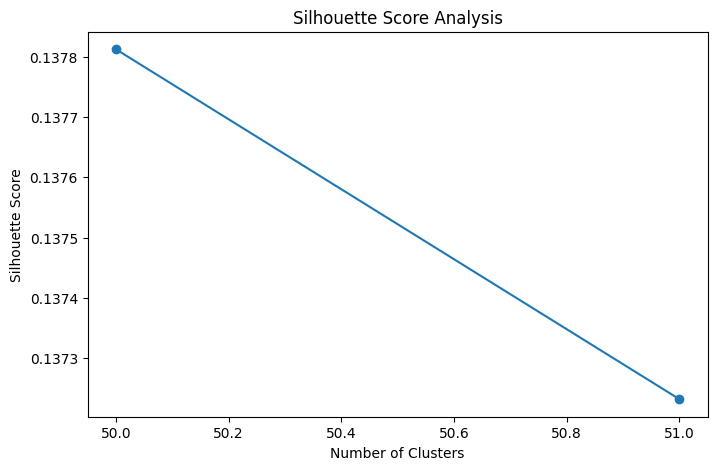

In [26]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette scores for a range of cluster values
silhouette_scores = []
k_values = range(50,52)  # Start from 2 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [31]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load data
df = pd.read_csv('/content/winemag-data-130k-v2.csv')

# Select relevant features
features = ['country', 'price', 'province', 'variety', 'winery']
df = df[features].dropna()

# Sample a random subset of 10,000 rows
df_sample = df.sample(n=10000, random_state=42)

# One-hot encode categorical features
categorical_features = ['country', 'province', 'variety', 'winery']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df_sample[categorical_features]).toarray()

# Normalize numerical features
scaler = StandardScaler()
normalized_price = scaler.fit_transform(df_sample[['price']])

# Combine features
X = np.hstack([encoded_cats, normalized_price])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust components as needed
X_pca = pca.fit_transform(X)

def recommend_similar_wine(input_wine):
    # Encode and normalize input wine
    input_encoded = encoder.transform([[
        input_wine['country'],
        input_wine['province'],
        input_wine['variety'],
        input_wine['winery']
    ]]).toarray()
    input_price = scaler.transform([[input_wine['price']]])
    input_features = np.hstack([input_encoded, input_price])

    # Project the input wine onto the PCA space and flatten it
    input_pca = pca.transform(input_features).flatten()

    # Compute distances to all wines in PCA space
    distances = np.apply_along_axis(lambda row: euclidean(input_pca, row), axis=1, arr=X_pca)

    # Find the index of the closest wine
    closest_idx = np.argmin(distances)

    # Retrieve the closest wine
    closest_wine = df_sample.iloc[closest_idx]
    return closest_wine

# Example usage
input_wine = {
    'country': 'Chile',
    'price': 9,
    'province': 'Maule Valley',
    'variety': 'Cabernet Sauvignon',
    'winery': ''
}

recommended_wine = recommend_similar_wine(input_wine)
print(recommended_wine)


country                  Chile
price                      9.0
province        Central Valley
variety     Cabernet Sauvignon
winery              Santa Rita
Name: 83292, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
def recommend_similar_wine(input_wine, n=5):
    # Encode and normalize input wine
    input_encoded = encoder.transform([[
        input_wine['country'],
        input_wine['province'],
        input_wine['variety'],
        input_wine['winery']
    ]]).toarray()
    input_price = scaler.transform([[input_wine['price']]])
    input_features = np.hstack([input_encoded, input_price])

    # Project the input wine onto the PCA space and flatten it
    input_pca = pca.transform(input_features.reshape(1, -1)).flatten()

    # Compute distances to all wines in PCA space
    distances = np.apply_along_axis(lambda row: euclidean(input_pca, row), axis=1, arr=X_pca)

    # Find the indices of the closest n wines
    closest_indices = np.argsort(distances)[:n]

    # Retrieve the closest wines
    closest_wines = df_sample.iloc[closest_indices]
    return closest_wines


In [33]:
# Example usage
input_wine = {
    'country': 'Chile',
    'price': 10,
    'province': 'Maule Valley',
    'variety': 'Cabernet Sauvignon',
    'winery': 'Santa Rita'
}

recommended_wine = recommend_similar_wine(input_wine, n = 10)
print(recommended_wine)


       country  price        province             variety              winery
60406    Chile   11.0    Maule Valley  Cabernet Sauvignon  Francisco Gillmore
85449    Chile   10.0  Central Valley  Cabernet Sauvignon   Misiones de Rengo
83292    Chile    9.0  Central Valley  Cabernet Sauvignon          Santa Rita
124828   Chile   10.0   Curicó Valley  Cabernet Sauvignon              Montes
46219    Chile   10.0    Maipo Valley  Cabernet Sauvignon     Haras de Pirque
61987    Chile    9.0  Central Valley  Cabernet Sauvignon   Espiritu de Chile
15393    Chile   12.0    Maule Valley  Cabernet Sauvignon         Bossy Boots
90611    Chile   10.0   Curicó Valley  Cabernet Sauvignon         San Nicolas
67550    Chile   10.0    Maipo Valley  Cabernet Sauvignon            Vistamar
22026    Chile   10.0    Maipo Valley  Cabernet Sauvignon       Tres Palacios


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Winery Stakeholders

In [36]:
# Load data
df = pd.read_csv('/content/winemag-data-130k-v2.csv')

# Take fraction of the data to prevent system crashing

sample_fraction = 0.1  # 10% of the data

# Randomly sample a fraction or fixed number of rows

df_copy = df.copy()
df_sampled = df_copy.sample(frac=sample_fraction, random_state=42)
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12997 entries, 77718 to 5049
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12997 non-null  int64  
 1   country                12992 non-null  object 
 2   description            12997 non-null  object 
 3   designation            9244 non-null   object 
 4   points                 12997 non-null  int64  
 5   price                  12088 non-null  float64
 6   province               12992 non-null  object 
 7   region_1               10838 non-null  object 
 8   region_2               5067 non-null   object 
 9   taster_name            10308 non-null  object 
 10  taster_twitter_handle  9821 non-null   object 
 11  title                  12997 non-null  object 
 12  variety                12997 non-null  object 
 13  winery                 12997 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.5+ M

In [37]:
# Prepare categorical data to be cleaned

# Replace null values in region_2 with value 'None'
df_sampled['region_2'] = df_sampled['region_2'].fillna('None')

# Replace null values in designation with value 'None'
df_sampled['designation'] = df_sampled['designation'].fillna('None')

# Drop unnecessary columns
df_sampled = df_sampled.drop(['taster_twitter_handle', 'title', 'Unnamed: 0'], axis=1)

df_sampled.info()

# DF for numeric data
df_numeric = df_sampled[['points', 'price']]

<class 'pandas.core.frame.DataFrame'>
Index: 12997 entries, 77718 to 5049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      12992 non-null  object 
 1   description  12997 non-null  object 
 2   designation  12997 non-null  object 
 3   points       12997 non-null  int64  
 4   price        12088 non-null  float64
 5   province     12992 non-null  object 
 6   region_1     10838 non-null  object 
 7   region_2     12997 non-null  object 
 8   taster_name  10308 non-null  object 
 9   variety      12997 non-null  object 
 10  winery       12997 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [38]:
# DF for wineries
df_wineries = df_sampled[['country', 'designation', 'winery', 'points', 'price', 'province', 'region_1', 'region_2', 'variety']]

# Classifications based on points

for index in df_wineries.index:
    points = df_wineries.loc[index, 'points']
    if points >= 90:
        df_wineries.loc[index, 'quality'] = 'High'
    elif points > 86 and points < 90:
        df_wineries.loc[index, 'quality'] = 'Medium'
    else:
        df_wineries.loc[index, 'quality'] = 'Low'

#df_wineries.head()
df_wineries['quality'].value_counts()


<ipython-input-38-8b5cf50fa4b2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wineries.loc[index, 'quality'] = 'Low'


,count
quality,
High,4939
Medium,4636
Low,3422


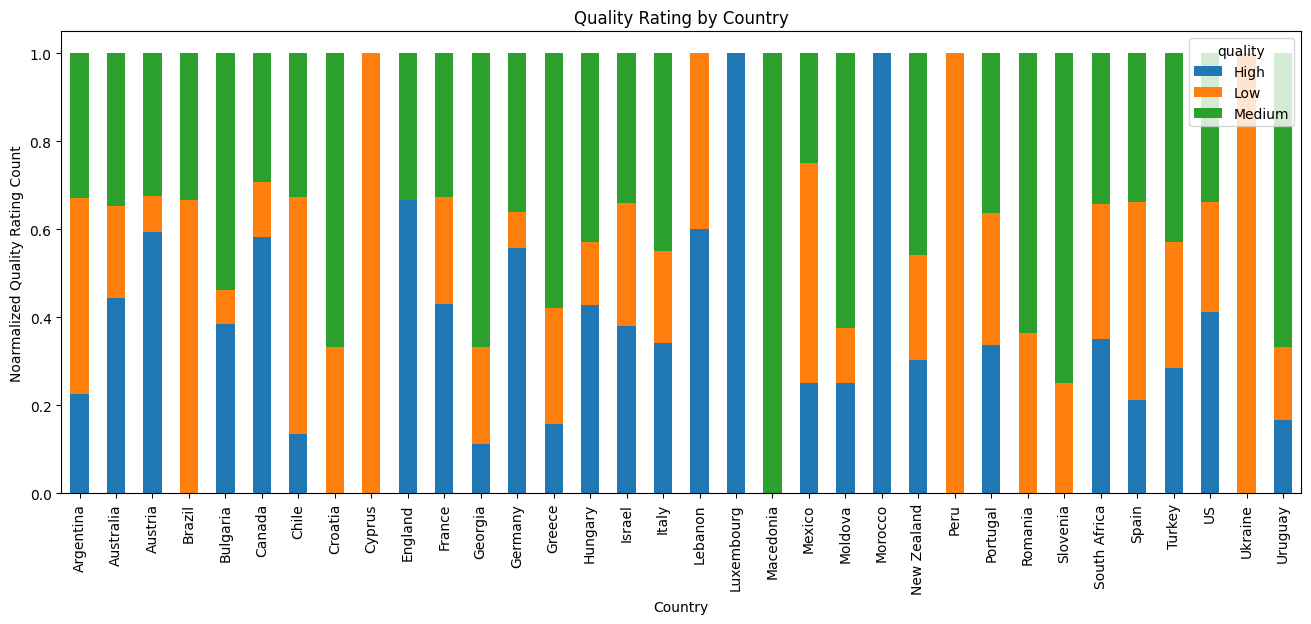

In [39]:
# Quality rating bar plot by country of origin
barplot = df_wineries.groupby('country')['quality'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(16, 6))
barplot.set_xlabel('Country')
barplot.set_ylabel('Noarmalized Quality Rating Count')
barplot.set_title('Quality Rating by Country')
plt.show()

In [40]:
# Clean the winery stakeholder data

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Identify outliers using IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Mask to identify outliers
outlier_mask = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
#print(outlier_mask.sum())

# Replace outliers with NaN in the original dataframe

df_outliers_imputed = df_numeric.copy()
df_outliers_imputed[outlier_mask] = np.nan

# Impute outliers with the mean from df_no_outliers

means = df_numeric.mean()  # Compute the mean for each column in df_numeric
df_outliers_imputed = df_outliers_imputed.fillna(means)  # Fill NaN with the means

# Scale the numeric data using the outlier-removed DataFrame

scaler = StandardScaler()
df_scaled_data = scaler.fit_transform(df_outliers_imputed)

# Create a new DataFrame with original columns and scaled data

df_scaled = pd.DataFrame(df_scaled_data, columns=df_outliers_imputed.columns, index=df_outliers_imputed.index)

# Concatenate the scaled data with the original DataFrame

df_scaled_data = pd.concat([df_wineries.drop(df_numeric.columns, axis=1), df_scaled], axis=1)


# Removing rows with missing values in the selected features

cleaned_data = df_scaled_data
cleaned_data = cleaned_data.dropna(subset=['country', 'designation', 'province', 'variety', 'region_1', 'region_2', 'winery'])

# Encode categorical data with one-hot-encoder

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(cleaned_data[['country', 'designation', 'province', 'variety', 'region_1', 'region_2', 'winery']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['country', 'designation', 'province', 'variety', 'region_1', 'region_2', 'winery']))

# Join the cleaned data and encoded data into single dataframe and reset the index

cleaned_wineries_data = cleaned_data[['points', 'price', 'quality']].reset_index(drop=True).join(encoded_df.reset_index(drop=True))


# Cleaned dataframe

cleaned_wineries_data.info()
cleaned_wineries_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Columns: 12076 entries, points to winery_àMaurice
dtypes: float64(12075), object(1)
memory usage: 998.5+ MB


,points,price,quality,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,...,winery_Zusslin,winery_a-non-ah-mus,winery_de Lancellotti,winery_ecoVINO,winery_esedos,winery_Ànima Negra,winery_Écluse,winery_Éric & Jöel Durand,winery_Öko,winery_àMaurice
0,-1.783441,-1.635893,Low,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.132137,-1.176398,Low,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.806485,-1.373324,Low,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.480833,-0.060482,Medium,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.155181,0.661581,Medium,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Decision Tree Classifier with Gradient Boosting (Winery Stakeholders)**

This decision tree classifier with gradient boosting is used to make predictive analyses on wine quality (points) based on the features in the dataframe df_wineries. This method is used to predict the quality classification on the basis of wine variety, the designation of the grape fields, the winery's location, the country the winery is located, and the region or regions that the winery is located. Gradient boosting works particularly well on regression problems but can also be adapted for classification in this case. This method will provide the wineries with insight on where to base their production and what grapes to harvest to yield the highest rated wines. The ratings are seperated into 3 quality rating categories to be classifed.

In [41]:
# Decision Tree Classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


# Take sample of the data to run classification

tree_sample_fraction = 0.1
sampled_wineries_data = cleaned_wineries_data.copy()
sampled_wineries_data = sampled_wineries_data.sample(frac=tree_sample_fraction, random_state=42)


# Define a custom mapping for quality levels

quality_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

# Use the mapping to create the 'quality_encoded' column

sampled_wineries_data['quality_encoded'] = sampled_wineries_data['quality'].map(quality_mapping)

#print(sampled_wineries_data[['quality_encoded', 'quality']])

# Define features and target

X = sampled_wineries_data.drop(['quality', 'points', 'quality_encoded'], axis = 1)
y = sampled_wineries_data['quality_encoded']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Gradient Boosting Classifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predictions

y_pred_gb = gb_classifier.predict(X_test)

# Perform 5-fold cross-validation

cv_scores = cross_val_score(gb_classifier, X, y, cv=5, scoring='accuracy')

# Output the results

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2%}")
print()
print("Decision Tree with Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Cross-Validation Accuracy Scores: [0.57142857 0.5437788  0.52995392 0.51152074 0.55092593]
Mean Accuracy: 54.15%

Decision Tree with Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.52      0.60        56
           1       0.47      0.44      0.45        79
           2       0.58      0.72      0.64        82

    accuracy                           0.57       217
   macro avg       0.59      0.56      0.57       217
weighted avg       0.58      0.57      0.56       217



**Decision Tree Classifier with Bagging (Winery Stakeholders)**

Bagging is another ensemble method that aims to lower the variance of an estimator by utilizing multiple instances of it. It is good practice to incorporate both bagging and boosting in a model to maximize error correction. Bagging methods will be compared with boosting methods to see which method yields the higher accuracy in the decision tree model.

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import LabelEncoder


# Define the base estimator for bagging (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=42)

# Define the Bagging Classifier
bagging_classifier = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# Initialize and train the Decision Tree with Bagging Classifier

bagging_classifier.fit(X_train, y_train)

# Predictions

y_pred_bagging = bagging_classifier.predict(X_test)

# Perform 5-fold cross-validation with accuracy scoring
accuracy_scores = cross_val_score(bagging_classifier, X, y, cv=5, scoring='accuracy')

# Print the accuracy scores
print(f"Cross-Validation Accuracy Scores: {accuracy_scores}")
print(f"Mean Accuracy: {accuracy_scores.mean():.2%}")
print()
print("Decision Tree with Bagging Classification Report:")
print(classification_report(y_test, y_pred_bagging))

Cross-Validation Accuracy Scores: [0.51612903 0.49769585 0.53456221 0.48847926 0.52777778]
Mean Accuracy: 51.29%

Decision Tree with Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57        56
           1       0.48      0.41      0.44        79
           2       0.58      0.72      0.64        82

    accuracy                           0.56       217
   macro avg       0.56      0.55      0.55       217
weighted avg       0.55      0.56      0.55       217



Other models such as **Random Forest** and **SVM** will also be trained and compared for F1-score precision and accuracy.

In [43]:
# Random Forest and SVM

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# Evaluate models

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model Report:")
    print(classification_report(y_test, y_pred))

Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59        56
           1       0.43      0.42      0.43        79
           2       0.54      0.67      0.60        82

    accuracy                           0.53       217
   macro avg       0.56      0.53      0.54       217
weighted avg       0.55      0.53      0.53       217

SVM Model Report:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        56
           1       0.45      0.47      0.46        79
           2       0.60      0.62      0.61        82

    accuracy                           0.54       217
   macro avg       0.55      0.54      0.54       217
weighted avg       0.54      0.54      0.54       217



**Evaluation of the models**

Because the decision tree with gradient boosting yields a slightly higher accuracy than the other models, the winery stakeholders will utilize the decision tree classifier with gradient boosting to make classifications on wine quality ratings based on the features necessary for the wineries. The accuracy and precision scores for the gradient boosting decision tree model indicates that this model is a deeper tree. However, this model still performed well and yielded the highest F1-score accuracy and precision for predicting the classifications.